In [2]:
import pandas as pd
# Read the entire file into a DataFrame
df = pd.read_csv("vdjdb.txt", delimiter='\t')  # Assuming the file is tab-delimited, adjust if needed

# Display the DataFrame
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'reference.id', 'method', 'meta', 'cdr3fix',
       'vdjdb.score', 'web.method', 'web.method.seq', 'web.cdr3fix.nc',
       'web.cdr3fix.unmp'], dtype=object)

In [3]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species','vdjdb.score', 'meta']]

In [4]:
df['species'].unique()

array(['HomoSapiens', 'MusMusculus', 'MacacaMulatta'], dtype=object)

In [5]:
pd.set_option('display.max_colwidth', None)
df[['meta']].head(3)

,meta
0,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*07:01,HLA-DRB*13:01"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""005"", ""tissue"": ""PBMC""}"
1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*07:01,HLA-DRB*13:01"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""005"", ""tissue"": ""PBMC""}"
2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:01;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*08:03:2,HLA-DRB*15:01:1"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""065"", ""tissue"": ""PBMC""}"


In [6]:
pd.reset_option('display.max_colwidth')

filtered_df = df[df['complex.id'] == 4]
filtered_df.head(5)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,meta
7,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."
8,4,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       92771 non-null  int64 
 1   gene             92771 non-null  object
 2   cdr3             92771 non-null  object
 3   v.segm           92670 non-null  object
 4   j.segm           91626 non-null  object
 5   species          92771 non-null  object
 6   mhc.a            92771 non-null  object
 7   mhc.b            92771 non-null  object
 8   mhc.class        92771 non-null  object
 9   antigen.epitope  92771 non-null  object
 10  antigen.gene     92709 non-null  object
 11  antigen.species  92771 non-null  object
 12  vdjdb.score      92771 non-null  int64 
 13  meta             92771 non-null  object
dtypes: int64(2), object(12)
memory usage: 9.9+ MB


In [8]:
df.dtypes

complex.id          int64
gene               object
cdr3               object
v.segm             object
j.segm             object
species            object
mhc.a              object
mhc.b              object
mhc.class          object
antigen.epitope    object
antigen.gene       object
antigen.species    object
vdjdb.score         int64
meta               object
dtype: object

In [9]:
df.shape

(92771, 14)

In [10]:
# Number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(280, 14)

In [11]:
df.count()

complex.id         92771
gene               92771
cdr3               92771
v.segm             92670
j.segm             91626
species            92771
mhc.a              92771
mhc.b              92771
mhc.class          92771
antigen.epitope    92771
antigen.gene       92709
antigen.species    92771
vdjdb.score        92771
meta               92771
dtype: int64

### Dropping duplicate rows

In [12]:
# Drop duplicate rows
df=df.drop_duplicates()
df.shape

(92491, 14)

### Dropping missing and null value

In [13]:
print(df.isnull().sum())

complex.id            0
gene                  0
cdr3                  0
v.segm               99
j.segm             1141
species               0
mhc.a                 0
mhc.b                 0
mhc.class             0
antigen.epitope       0
antigen.gene         62
antigen.species       0
vdjdb.score           0
meta                  0
dtype: int64


In [14]:
df=df.dropna()
df.shape

(91274, 14)

**After dropping null value**
* Bulleted

In [15]:
print(df.isnull().sum())

complex.id         0
gene               0
cdr3               0
v.segm             0
j.segm             0
species            0
mhc.a              0
mhc.b              0
mhc.class          0
antigen.epitope    0
antigen.gene       0
antigen.species    0
vdjdb.score        0
meta               0
dtype: int64


<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>


<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

>**## Exploring the data ##**

In [16]:
# Specify the substring to search for
# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
substring = 'CD8+'

# Use boolean indexing to filter rows containing the substring in 'Description'

filtered_df = df[df['meta'].str.contains(substring, case=False, na=False)]

filtered_df[filtered_df['mhc.class']=='MHCII'].head(3)



,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,meta
5309,0,TRB,CASSKLASTAGEQYF,TRBV2*01,TRBJ2-7*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*11:01,MHCII,DRFYKTLRAEQASQEV,Gag,HIV-1,1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."
5310,0,TRB,CASSGGQETQYF,TRBV14*01,TRBJ2-5*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*01:01,MHCII,LNKIVRMYSPTSILD,Gag,HIV-1,1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."
5311,0,TRB,CASSWDSNYGYTF,TRBV5-5*01,TRBJ1-2*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*01:01,MHCII,DRFYKTLRAEQASQEV,Gag,HIV-1,1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."


##  TCRDist3

In [17]:
df_dash = pd.read_csv("https://raw.githubusercontent.com/kmayerb/tcrdist2/API2/tcrdist/test_files_compact/dash.csv")

In [18]:
df_dash.head(3)

,subject,epitope,count,v_a_gene,j_a_gene,cdr3_a_aa,cdr3_a_nucseq,v_b_gene,j_b_gene,cdr3_b_aa,cdr3_b_nucseq,clone_id
0,mouse_subject0050,PA,2,TRAV7-3*01,TRAJ33*01,CAVSLDSNYQLIW,tgtgcagtgagcctcgatagcaactatcagttgatctgg,TRBV13-1*01,TRBJ2-3*01,CASSDFDWGGDAETLYF,tgtgccagcagtgatttcgactggggaggggatgcagaaacgctgt...,mouse_tcr0072.clone
1,mouse_subject0050,PA,6,TRAV6D-6*01,TRAJ56*01,CALGDRATGGNNKLTF,tgtgctctgggtgacagggctactggaggcaataataagctgactttt,TRBV29*01,TRBJ1-1*01,CASSPDRGEVFF,tgtgctagcagtccggacaggggtgaagtcttcttt,mouse_tcr0096.clone
2,mouse_subject0050,PA,1,TRAV6D-6*01,TRAJ49*01,CALGSNTGYQNFYF,tgtgctctgggctcgaacacgggttaccagaacttctatttt,TRBV29*01,TRBJ1-5*01,CASTGGGAPLF,tgtgctagcacagggggaggggctccgcttttt,mouse_tcr0276.clone


## Installing tcrdist3 package ##

In [19]:
# pip install tcrdist3
# installing tcrdist3

In [20]:
# from tcrdist.repertoire import TCRrep
# tr = TCRrep(cell_df = df_dash, 
#             organism = 'mouse', 
#             chains = ['alpha','beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv')

# tr.pw_alpha
# # tr.pw_beta
# # tr.pw_cdr3_a_aa
# # tr.pw_cdr3_b_aa

In [21]:
# tr = TCRrep(cell_df = df_dash,
#             organism = 'mouse',
#             chains = ['alpha','beta'],
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)

# tr.cpus = 2
# tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
# tr.rw_beta
# # """<1920x1920 sparse matrix of type '<class 'numpy.int16'>'
# # with 108846 stored elements in Compressed Sparse Row format>
# # """
# # print(tr.rw_beta)    

In [22]:
# print(tr.rw_beta)    

## Preprocess vdjdb.text data frame for tcrdist3

In [23]:
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'vdjdb.score', 'meta'], dtype=object)

In [24]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'antigen.epitope', 'antigen.gene', 'vdjdb.score']]

In [25]:
filter=df['vdjdb.score']==0
df=df[~filter]
df.head(5)

,complex.id,gene,cdr3,v.segm,j.segm,species,antigen.epitope,antigen.gene,vdjdb.score
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,2
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,2
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,2
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,2
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,2


# Separating data set in to alpha and beta dataframe

# Alpha data frame

In [26]:
import pandas as pd

# Assuming df is your original dataframe
# Create separate dataframes for alpha and beta chains
df_alpha = df[df['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'})
df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})

In [27]:
df_alpha.reset_index(drop=True, inplace=True)

In [28]:
df_alpha['species'].unique()

array(['HomoSapiens', 'MusMusculus'], dtype=object)

### Removing mouse and monkey

In [29]:
df_alpha = df_alpha[~df_alpha['species'].isin(['MusMusculus', 'MacacaMulatta'])]

In [30]:
df_alpha['species'].unique()

array(['HomoSapiens'], dtype=object)

In [31]:
df_alpha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2721 entries, 0 to 3644
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       2721 non-null   int64 
 1   gene             2721 non-null   object
 2   cdr3_a_aa        2721 non-null   object
 3   v_a_gene         2721 non-null   object
 4   j_a_gene         2721 non-null   object
 5   species          2721 non-null   object
 6   antigen.epitope  2721 non-null   object
 7   antigen.gene     2721 non-null   object
 8   vdjdb.score      2721 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 212.6+ KB


### Dropping null values

In [32]:
df_alpha=df_alpha.dropna()
print(df_alpha.isnull().sum())

complex.id         0
gene               0
cdr3_a_aa          0
v_a_gene           0
j_a_gene           0
species            0
antigen.epitope    0
antigen.gene       0
vdjdb.score        0
dtype: int64


### Dropping duplicates

In [33]:
df_alpha=df_alpha.drop_duplicates()
df_alpha.shape

(2401, 9)

In [34]:
df_alpha

,complex.id,gene,cdr3_a_aa,v_a_gene,j_a_gene,species,antigen.epitope,antigen.gene,vdjdb.score
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,2
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,2
2,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,Nef,2
3,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,Nef,2
4,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEQGGL,Nef,2
...,...,...,...,...,...,...,...,...,...
3640,30550,TRA,CIALNARLMF,TRAV26-1*01,TRAJ31*01,HomoSapiens,PQPELPYPQPQL,Gluten,2
3641,30551,TRA,CAMREGRYSSASKIIF,TRAV14/DV4*01,TRAJ3*01,HomoSapiens,FPQPEQPFPWQP,Gluten,2
3642,30552,TRA,CLVGDGDGGATNKLIF,TRAV4*01,TRAJ32*01,HomoSapiens,FPQPEQPFPWQP,Gluten,2
3643,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,QLQPFPQPELPY,Gluten,2


## Run TCRDist on alpha gene dataset

In [35]:
from tcrdist.repertoire import TCRrep
tr = TCRrep(cell_df = df_alpha, 
            organism = 'human', 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


In [36]:
print(tr.pw_alpha.shape)

(2401, 2401)


# Beta data frame - human

In [37]:
df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})

In [38]:
df_beta['species'].unique()

array(['HomoSapiens', 'MusMusculus', 'MacacaMulatta'], dtype=object)

In [39]:
df_beta = df_beta[~df_beta['species'].isin(['MusMusculus', 'MacacaMulatta'])]

In [40]:
df_beta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6471 entries, 1 to 92768
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       6471 non-null   int64 
 1   gene             6471 non-null   object
 2   cdr3_b_aa        6471 non-null   object
 3   v_b_gene         6471 non-null   object
 4   j_b_gene         6471 non-null   object
 5   species          6471 non-null   object
 6   antigen.epitope  6471 non-null   object
 7   antigen.gene     6471 non-null   object
 8   vdjdb.score      6471 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 505.5+ KB


In [41]:
df_beta=df_beta.dropna()
print(df_beta.isnull().sum())

complex.id         0
gene               0
cdr3_b_aa          0
v_b_gene           0
j_b_gene           0
species            0
antigen.epitope    0
antigen.gene       0
vdjdb.score        0
dtype: int64


In [42]:
df_beta=df_beta.drop_duplicates()
df_beta.shape

(5263, 9)

In [43]:
from tcrdist.repertoire import TCRrep
tr = TCRrep(cell_df = df_beta, 
            organism = 'human', 
            chains = ['beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

tr.pw_beta

/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


array([[  0, 170, 159, ..., 151, 141, 140],
       [170,   0, 127, ..., 148, 174, 160],
       [159, 127,   0, ..., 140, 157, 153],
       ...,
       [151, 148, 140, ...,   0, 121,  97],
       [141, 174, 157, ..., 121,   0, 122],
       [140, 160, 153, ...,  97, 122,   0]], dtype=int16)

In [44]:
print(tr.pw_beta.shape)

(5263, 5263)


## Adding extra data file from TCRDist

In [45]:
from tcrdist.setup_tests import list_available_zip_files  
list_available_zip_files()

['dash.zip',
 'bulk.zip',
 'olga_T_alpha_beta_1000K_simulated_cdr3.zip',
 'cdr3_beta_500K.zip',
 'human_T_alpha_beta_sim200K.zip',
 'vdjDB_PMID28636592.zip',
 'sant.csv.zip',
 'bulk.csv.zip',
 'wiraninha_sampler.zip',
 'ruggiero_mouse_sampler.zip',
 'ruggiero_human_sampler.zip',
 'britanova_human_beta_t_cb.tsv.sampler.tsv.zip',
 'emerson_human_beta_t_cmvneg.tsv.sampler.tsv.zip',
 'ruggiero_human_alpha_t.tsv.sampler.tsv.zip',
 'ruggiero_human_beta_t.tsv.sampler.tsv.zip',
 'ImmunoSeq_MIRA_matched_tcrdist3_ready.zip',
 'ImmunoSeq_MIRA_matched_tcrdist3_ready_2_files.zip',
 'bioRxiv_v2_metaclonotypes.tsv.zip',
 'ImmunoSEQhsTCRBV4b_tcrdist3.zip',
 '2021-04-02-Release_v2.1_metaclonotypes_concise.tsv.zip',
 '2021-04-02-Release_v2.1_TCRs_concise_covid_only.tsv.zip']

In [46]:
from tcrdist.setup_tests import download_and_extract_zip_file
download_and_extract_zip_file( 'dash.zip', source = "dropbox", dest = ".")
import os
assert os.path.isfile("dash.zip")
assert os.path.isfile("dash.csv")
assert os.path.isfile("dash2.csv")
assert os.path.isfile("dash_human.csv")
assert os.path.isfile("dash_beta_airr.csv")

In [47]:
import os
os.getcwd()

'/Users/dangngocbach/Desktop/Miniproject/dsmp-2024-group-7'

## Create data frame with alpha and beta chain

In [48]:
df_alpha = df[df['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'})
df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})

In [49]:
df_alpha

,complex.id,gene,cdr3_a_aa,v_a_gene,j_a_gene,species,antigen.epitope,antigen.gene,vdjdb.score
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,2
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,2
7,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,Nef,2
9,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,Nef,2
12,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEQGGL,Nef,2
...,...,...,...,...,...,...,...,...,...
92681,30550,TRA,CIALNARLMF,TRAV26-1*01,TRAJ31*01,HomoSapiens,PQPELPYPQPQL,Gluten,2
92683,30551,TRA,CAMREGRYSSASKIIF,TRAV14/DV4*01,TRAJ3*01,HomoSapiens,FPQPEQPFPWQP,Gluten,2
92685,30552,TRA,CLVGDGDGGATNKLIF,TRAV4*01,TRAJ32*01,HomoSapiens,FPQPEQPFPWQP,Gluten,2
92689,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,QLQPFPQPELPY,Gluten,2


In [50]:
df_alpha = df_alpha[df_alpha['complex.id'] != 0].reset_index(drop=True)
df_beta = df_beta[df_beta['complex.id'] != 0].reset_index(drop=True)

In [51]:
df_merge = pd.merge(df_alpha, df_beta, on='complex.id')
df_merge.shape

(2739, 17)

In [52]:
df_merge.drop(['species_y'], axis=1, inplace=True)

In [53]:
df_merge.species_x.value_counts()

HomoSapiens    1840
MusMusculus     899
Name: species_x, dtype: int64

In [54]:
filter=df_merge['species_x']=='MusMusculus'
df_merge[~filter].reset_index(drop=True, inplace=True)
df_merge.head(5)

,complex.id,gene_x,cdr3_a_aa,v_a_gene,j_a_gene,species_x,antigen.epitope_x,antigen.gene_x,vdjdb.score_x,gene_y,cdr3_b_aa,v_b_gene,j_b_gene,antigen.epitope_y,antigen.gene_y,vdjdb.score_y
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,2,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL,Nef,2
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL,Nef,2
2,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,Nef,2,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,FLKEKGGL,Nef,2
3,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,Nef,2,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEQGGL,Nef,2
4,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEQGGL,Nef,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEQGGL,Nef,2


In [55]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2739 entries, 0 to 2738
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   complex.id         2739 non-null   int64 
 1   gene_x             2739 non-null   object
 2   cdr3_a_aa          2739 non-null   object
 3   v_a_gene           2739 non-null   object
 4   j_a_gene           2739 non-null   object
 5   species_x          2739 non-null   object
 6   antigen.epitope_x  2739 non-null   object
 7   antigen.gene_x     2739 non-null   object
 8   vdjdb.score_x      2739 non-null   int64 
 9   gene_y             2739 non-null   object
 10  cdr3_b_aa          2739 non-null   object
 11  v_b_gene           2739 non-null   object
 12  j_b_gene           2739 non-null   object
 13  antigen.epitope_y  2739 non-null   object
 14  antigen.gene_y     2739 non-null   object
 15  vdjdb.score_y      2739 non-null   int64 
dtypes: int64(3), object(13)
memory usage: 363.

In [56]:
# df_dash

# df = df_dash[df_dash['subject'].str.contains('mouse')] 
# #search for a specific string in a cell
# #select rows that contain specific text using pandas

### Radius

In [57]:
df_dash['epitope'].value_counts()

PB1     642
PA      324
NP      305
M45     291
M38     158
F2      117
m139     87
Name: epitope, dtype: int64

In [58]:
df_merge[['v_a_gene', 'j_a_gene','v_b_gene', 'j_b_gene']]

,v_a_gene,j_a_gene,v_b_gene,j_b_gene
0,TRAV26-1*01,TRAJ43*01,TRBV13*01,TRBJ1-5*01
1,TRAV20*01,TRAJ28*01,TRBV13*01,TRBJ1-5*01
2,TRAV38-2/DV8*01,TRAJ40*01,TRBV14*01,TRBJ2-1*01
3,TRAV26-1*01,TRAJ43*01,TRBV13*01,TRBJ1-5*01
4,TRAV20*01,TRAJ28*01,TRBV13*01,TRBJ1-5*01
...,...,...,...,...
2734,TRAV26-1*01,TRAJ31*01,TRBV7-2*01,TRBJ2-3*01
2735,TRAV14/DV4*01,TRAJ3*01,TRBV15*01,TRBJ1-4*01
2736,TRAV4*01,TRAJ32*01,TRBV4-3*01,TRBJ2-1*01
2737,TRAV29/DV5*01,TRAJ37*01,TRBV19*01,TRBJ2-1*01


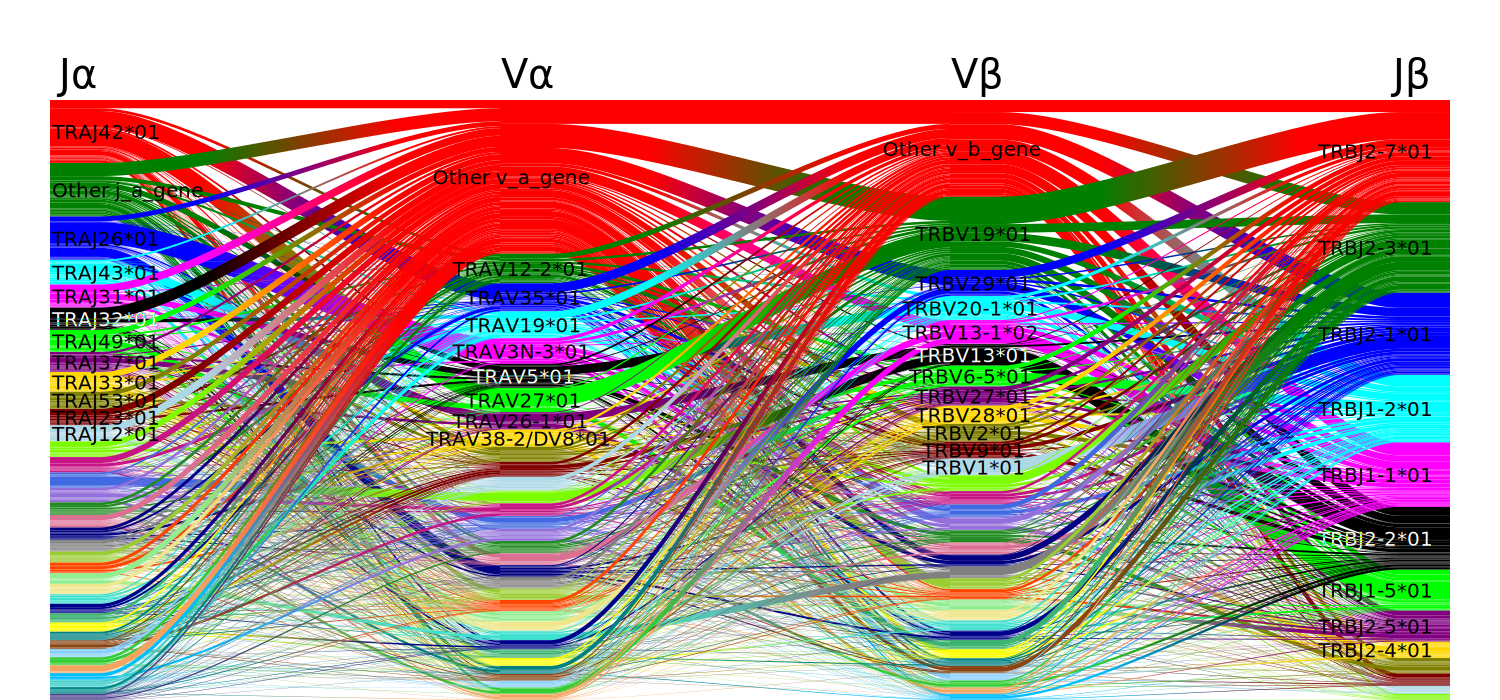

In [59]:
import tcrdist as td
import pandas as pd
import numpy as np
import IPython
from tcrdist import plotting

df_merge = df_merge.assign(count=1)
df_merge.loc[:10, 'count'] = 10 # Sim expansion of the genes used in the first 10 rows

svg = plotting.plot_pairings(cell_df = df_merge,
                                cols = ['j_a_gene', 'v_a_gene',
                                        'v_b_gene', 'j_b_gene'],
                                count_col='count')
IPython.display.SVG(data=svg)

### How to implement PCA, tSNE and UMAP.

In [60]:
from tcrdist.repertoire import TCRrep
tr = TCRrep(cell_df = df_merge, 
            organism = 'human', 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:500: UserWarning: TRAV9-4*01 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:500: UserWarning: TRAV14-1*01 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:500: UserWarning: TRAV14-3*01 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:500: UserWarning: TRAV6D-7*01 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
/opt/anaconda3/lib/python3.9/site-packages/tcrdist/repertoire.py:500: UserWarning: TRAV4-2*01 gene wa

In [61]:
tr.pw_alpha.shape

(1877, 1877)

In [62]:
tr.pw_beta.shape

(1877, 1877)

In [63]:
tr.pw_cdr3_a_aa

array([[ 0, 29, 20, ..., 42, 46, 29],
       [29,  0, 26, ..., 30, 35, 30],
       [20, 26,  0, ..., 36, 40, 23],
       ...,
       [42, 30, 36, ...,  0, 31, 24],
       [46, 35, 40, ..., 31,  0, 36],
       [29, 30, 23, ..., 24, 36,  0]], dtype=int16)

In [64]:
tr.pw_cdr3_b_aa

array([[ 0, 13, 44, ..., 48, 47, 46],
       [13,  0, 44, ..., 44, 41, 42],
       [44, 44,  0, ..., 19, 23, 28],
       ...,
       [48, 44, 19, ...,  0, 24, 19],
       [47, 41, 23, ..., 24,  0, 21],
       [46, 42, 28, ..., 19, 21,  0]], dtype=int16)

In [65]:
pw_distance = tr.pw_cdr3_a_aa + tr.pw_cdr3_b_aa

### Combined alpha and beta distance

In [66]:
pw_distance.shape

(1877, 1877)

### Testing PCA 

In [67]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [68]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split into training and testing sets
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,
    stratify=y, random_state=0
)
# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [70]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

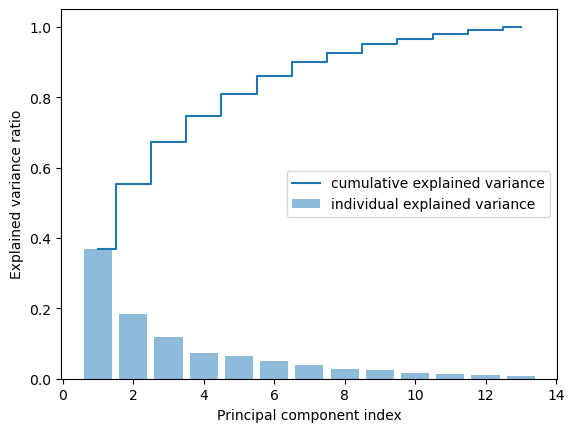

In [71]:
import matplotlib.pyplot as plt

# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,14), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [72]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [73]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [74]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [75]:
X_train_pca = X_train_std.dot(w)

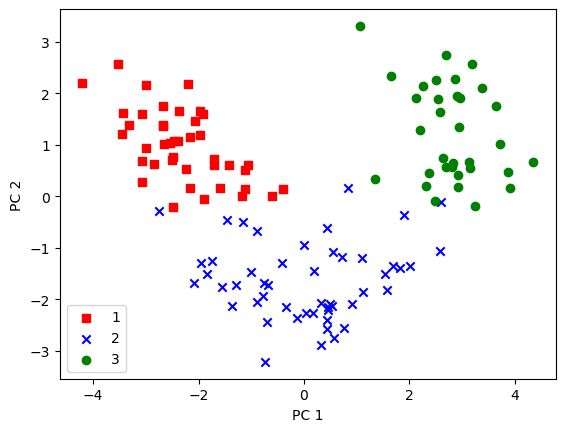

In [76]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# intialize pca and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

# fit and transform data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

LogisticRegression(solver='liblinear')

In [78]:
from sklearn.datasets import load_digits
X, _ = load_digits(return_X_y=True)
X.shape


(1797, 64)

In [79]:
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


### Testing MDS

Original Dimesnion of X =  (1797, 64)
Dimesnion of X after MDS =  (1797, 2)


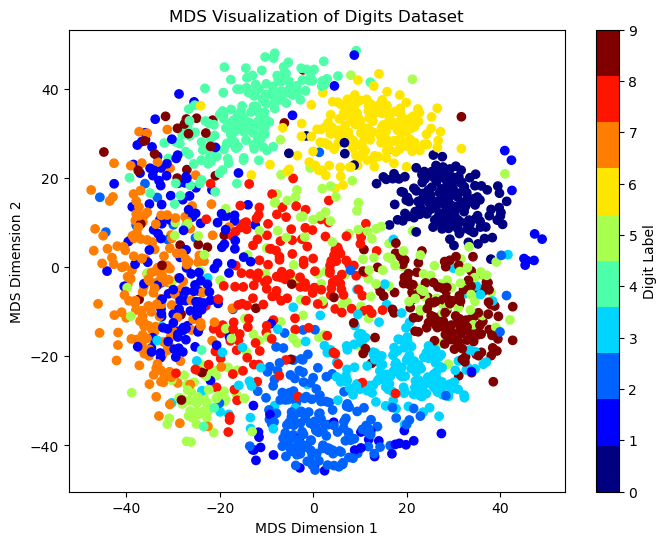

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import MDS

# Load a sample dataset (e.g., the digits dataset)
data = load_digits()
X, y = data.data, data.target

print('Original Dimesnion of X = ', X.shape)
# Create an MDS model with the desired number of dimensions
# Number of dimensions for visualization
n_components = 2
mds = MDS(n_components=n_components)

# Fit the MDS model to your data
X_reduced = mds.fit_transform(X)

print('Dimesnion of X after MDS = ',X_reduced.shape)

# Visualize the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(label='Digit Label', ticks=range(10))
plt.title("MDS Visualization of Digits Dataset")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()


In [81]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import MDS

In [96]:
alpha_chain = tr.pw_alpha
alpha_chain

array([[  0, 138, 110, ..., 159, 194, 149],
       [138,   0, 131, ..., 141, 152, 132],
       [110, 131,   0, ..., 166, 173, 129],
       ...,
       [159, 141, 166, ...,   0, 141, 133],
       [194, 152, 173, ..., 141,   0, 158],
       [149, 132, 129, ..., 133, 158,   0]], dtype=int16)

In [93]:
data.target

array([0, 1, 2, ..., 8, 9, 8])

In [98]:
## Ploting pairwise alpha chain

print("Original Dimensionn of alpha chain  =", tr.pw_alpha.shape)

#Create an MDS model with the desired number of dimensions
#Number of dimensions for visualization

n_components = 2
msd = MDS(n_components = n_components)

#Fit the MDS model to the data
X_reduced = mds.fit_transform(alpha_chain)

Original Dimensionn of alpha chain  = (1877, 1877)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_mds.py:626: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


In [100]:
print(X_reduced.shape)

(1877, 2)


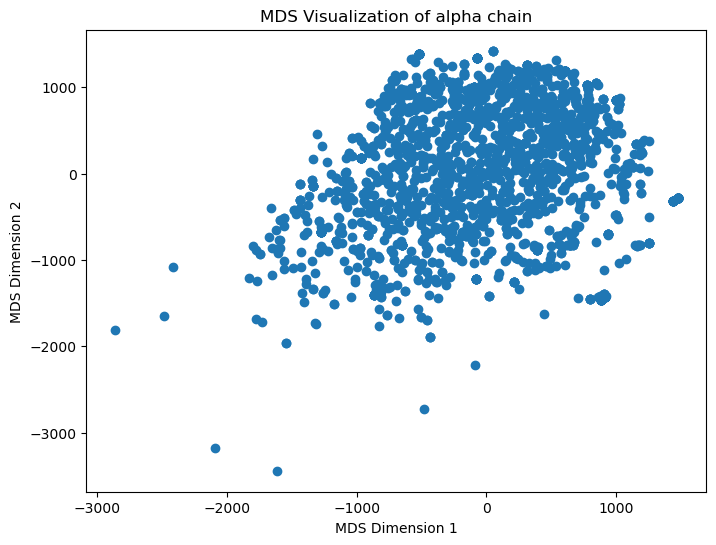

In [102]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.title("MDS Visualization of alpha chain")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()